## 1. Data cleansing and integration

In [ ]:
import pandas as pd

#Load data
df_properties = pd.read_csv('../data/landing/rent_data.csv')


# Remove non-numeric characters in the price column, leaving only the numerical part
df_properties['price'] = df_properties['price'].str.extract('(\d+)').astype(float)

# Handle missing values
df_properties['price'] = df_properties['price'].replace('', None).astype(float)
df_properties['price'].fillna(df_properties['price'].median(), inplace=True)
df_properties['bedrooms'] = df_properties['bedrooms'].replace('', None).astype(int)
df_properties['bedrooms'].fillna(1, inplace=True)

# Load external demographic data
df_population = pd.read_csv('../data/landing/External_data/SA2_population/SA2_population_data_table_3.csv', skiprows=4)

# Select and rename important columns
df_population_cleaned = df_population[['Unnamed: 4', 'Unnamed: 29']].rename(columns={
    'Unnamed: 4': 'sa2_name',
    'Unnamed: 29': 'total_population'  
})

# Make sure 'suburb' in the property data matches 'sa2_name' in the demographic data
# Merge property data with demographic data
df_merged = pd.merge(df_properties, df_population_cleaned, how='left', left_on='suburb', right_on='sa2_name')

# View the merged data
print(df_merged.head())

# Save the cleaned and merged data
df_merged.to_csv('../data/raw/merged_data.csv', index=False)



## 2. In-depth analysis and initial insights

### 2.1 Viewing average rents in different areas

In [14]:
suburb_avg_rent = df_merged.groupby('suburb')['price'].mean().sort_values(ascending=False)
print(suburb_avg_rent.head(10))

suburb
ECHUCA              1803.705882
WONGA PARK          1600.000000
PORTSEA             1500.000000
BITTERN             1500.000000
STEIGLITZ           1275.000000
FRESHWATER CREEK    1100.000000
OLINDA              1100.000000
TONIMBUK            1000.000000
MERRICKS BEACH       950.000000
COTTLES BRIDGE       950.000000
Name: price, dtype: float64


### 2.2 Average rent for different number of bedrooms

   bedrooms   price
0         4  1900.0
1         2   845.0
2         2   800.0
3         2   750.0
4         1   750.0
5         2   720.0
6         2   700.0
7         2   700.0
8         1   625.0
9         2   600.0


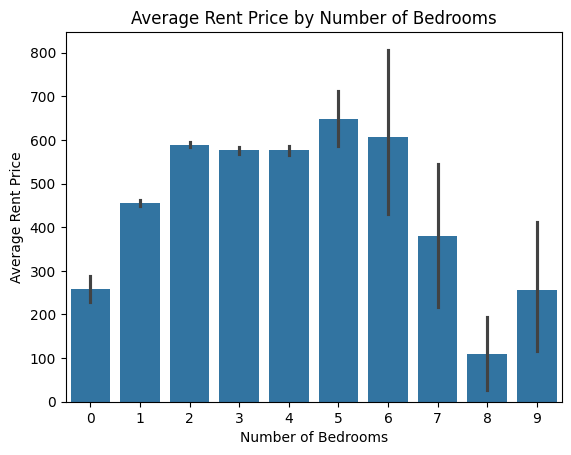

In [30]:
print(df_merged[['bedrooms', 'price']].dropna().head(10))

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

# Draw a histogram of the average rent for different number of bedrooms
sns.barplot(x='bedrooms', y='price', data=df_merged, estimator=np.mean)
plt.title('Average Rent Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent Price')
plt.savefig('bedrooms_vs_rent_price.png')
plt.show()


## 3. Generation of preliminary reports and visualizations

### 3.1 Report generation

In [24]:
from IPython.display import display, Markdown

# Calculate the average rent for each number of bedrooms
bedroom_avg_rent = df_merged.groupby('bedrooms')['price'].mean().sort_values(ascending=False)

# Get the number of bedrooms with the highest average rent and the corresponding rent
highest_bedrooms = bedroom_avg_rent.index[0]
highest_rent = bedroom_avg_rent.iloc[0]

# Generate report
display(Markdown("### Initial Insights"))
display(Markdown(f"1. The area with the highest rent is: {suburb_avg_rent.index[0]}, The average rent is {suburb_avg_rent.iloc[0]}"))
display(Markdown(f"2. Properties with {highest_bedrooms} bedrooms have the highest average rent, with an average rent of {highest_rent}"))



### Initial Insights

1. The area with the highest rent is: ECHUCA, The average rent is 1803.7058823529412

2. Properties with 5 bedrooms have the highest average rent, with an average rent of 647.1216216216217